# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Now let's hack the rotated CAPTCHA!

(64, 64)


C:\Users\ly\Desktop\ML_dc\ml2018winter_hw4\pca\hack_pca.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


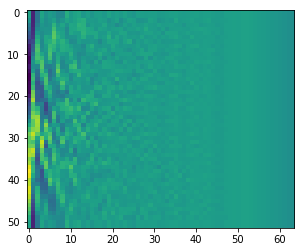

In [57]:
from hack_pca import hack_pca

# Hack different images yourself
img = hack_pca('1.gif')
plt.imshow(img)

## Apply PCA on face image

In [ ]:
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE

# 1. Feature preprocessing
# begin answer

# end answer
from show_face import show_face
show_face(fea_Train)

In [ ]:
# 2. Run PCA
# begin answer

# end answer
# 3. Visualize eigenface
# begin answer

# end answer

In [ ]:
# 4. Project data on to low dimensional space
# begin answer

# end answer

# 5. Run KNN in low dimensional space
# begin answer

# end answer
# 6. Recover face images form low dimensional space, visualize them
# begin answer

# end answer  

## You are encouraged to apply LDA on this dataset!

In [ ]:
from LDA import LDA

# Your code here
# begin answer

# end answer